# Models Inverse Kinematics

## Imports

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from utils import dispIK_2R, dispIK_3R, Model, angular_loss

## I - Loading the models

In [14]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                print(f"2R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_2R.append(model)
            elif '3R' in filename:
                print(f"3R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_3R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")

3R Model found : NN1_3R_p10_e20.keras
2R Model found : NN1_2R_p10_e20.keras
Number of 2R models : 1
Number of 3R models : 1


## I - Inverse Kinematics - Newton-Raphson method

# 1.1) 2R Robot

===== Step n°0 =====
Current Position: [-0.01863897  0.14993563]
Intermediate joint angles: [0.7853982 1.5707964]

===== Step n°1 =====
Current Position: [-0.03699678 -0.00762736]
Intermediate joint angles: [-1.2822473  3.496784 ]

===== Step n°2 =====
Current Position: [-0.04231383 -0.10331707]
Intermediate joint angles: [9.599335  1.9747708]

===== Step n°3 =====
Current Position: [0.00215218 0.01721642]
Intermediate joint angles: [10.193686   3.2378411]

===== Step n°4 =====
Current Position: [ 0.1827334  -0.07857954]
Intermediate joint angles: [5.589563   0.47681594]

===== Step n°5 =====
Current Position: [-0.10721509  0.10274104]
Intermediate joint angles: [3.3395028 4.5173244]

===== Step n°6 =====
Current Position: [ 0.02507225 -0.10704528]
Intermediate joint angles: [3.8696363 1.9736266]

===== Step n°7 =====
Current Position: [ 0.03790149 -0.00445402]
Intermediate joint angles: [4.3710876 2.938502 ]

===== Step n°8 =====
Current Position: [0.0816521  0.02203483]
Intermediate 

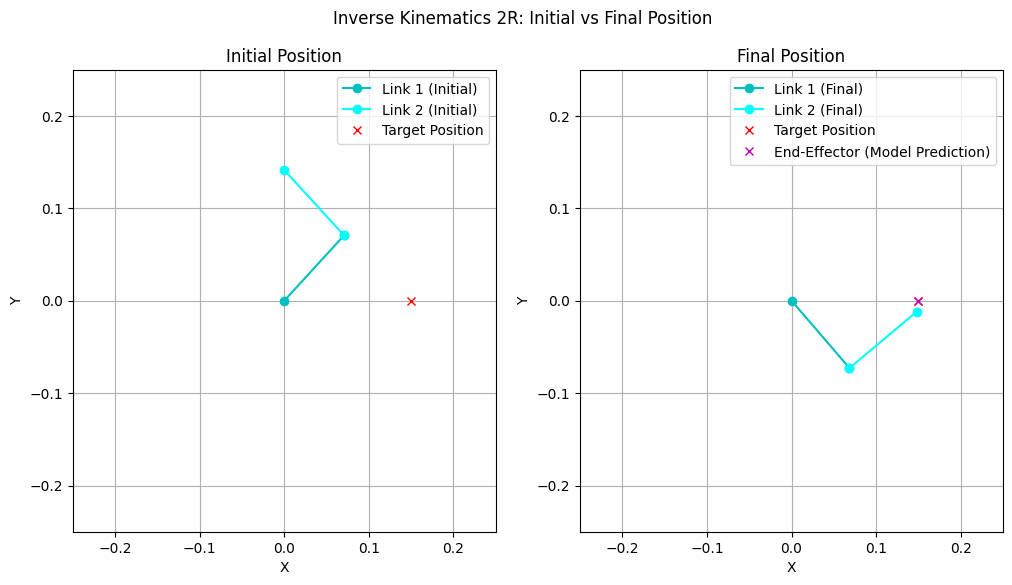

Distance error: 0.012209824286401272



In [15]:
model_2R = MODELS_2R[0].model
name_2R = MODELS_2R[0].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False
    
target_position = [0.15, 0] 
initial_guess = [np.pi/4, np.pi/2]  
dispIK_2R(model_2R, target_position, initial_guess, raw, display_error=True)

# 1.2) 3R Robot

===== Step n°0 =====
Current Position: [ 0.23471737 -0.01126593]
Intermediate joint angles: [-0.7853982  0.5235988  0.7853982]

===== Step n°1 =====
Current Position: [-0.07742593 -0.18944646]
Intermediate joint angles: [-2.3905406  1.9106207  4.362181 ]

===== Step n°2 =====
Current Position: [-0.10341925 -0.04757487]
Intermediate joint angles: [-3.2045622  3.0629244  3.1227756]

===== Step n°3 =====
Current Position: [-0.10941276  0.07887246]
Intermediate joint angles: [-4.6569614  6.1719685  3.0992148]

===== Step n°4 =====
Current Position: [-0.10797303  0.04154775]
Intermediate joint angles: [-4.1917243  6.459472   3.07311  ]

===== Step n°5 =====
Current Position: [-0.11622687  0.119671  ]
Intermediate joint angles: [-4.3331165  6.4843516  3.7373724]

===== Step n°6 =====
Current Position: [-0.13613607  0.06958689]
Intermediate joint angles: [-4.136088   6.745352   3.4659636]

===== Step n°7 =====
Current Position: [-0.13853402  0.08446226]
Intermediate joint angles: [-4.5728073 

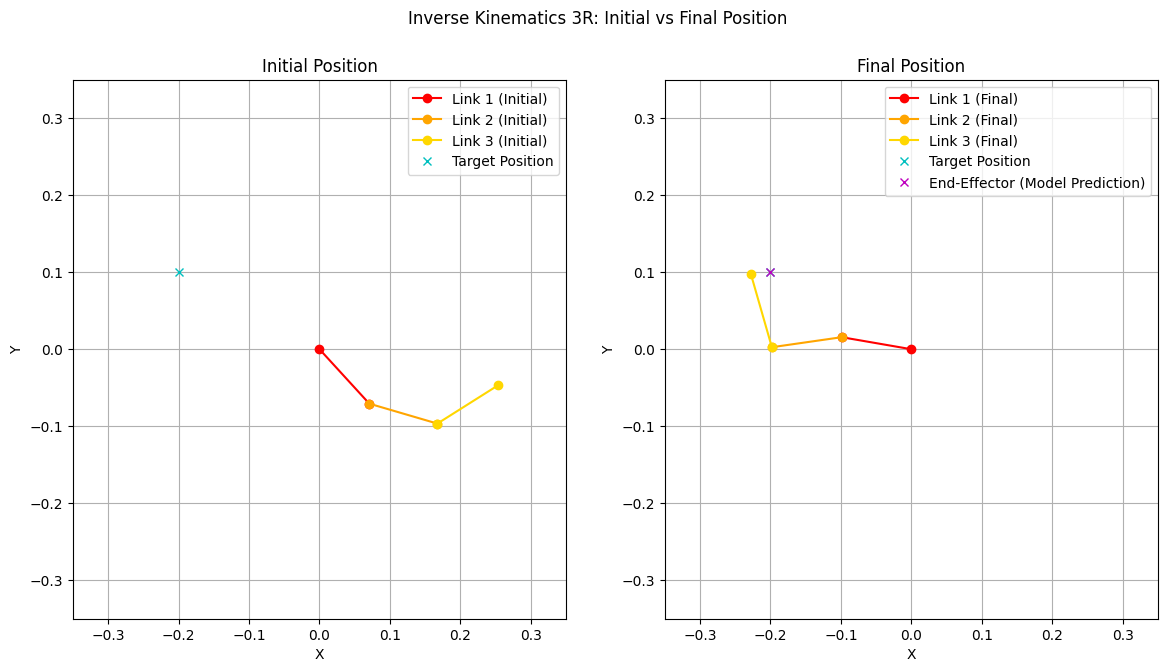

Distance error: 0.027895735576748848



In [16]:
model_3R = MODELS_3R[0].model
name_3R = MODELS_3R[0].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

target_position = [-0.2, 0.1] 
initial_guess = [-np.pi/4, np.pi/6, np.pi/4]  
dispIK_3R(model_3R, target_position, initial_guess, raw, display_error=True)